In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'synthetic_player_performance_data.csv'
df = pd.read_csv(file_path)

# Check for missing values
missing_values = df.isnull().sum()

# Filter the DataFrame based on Match_Type for different formats
df_t20 = df[df['Match_Type'] == 'T20'].copy()
df_odi = df[df['Match_Type'] == 'ODI'].copy()
df_test = df[df['Match_Type'] == 'Test'].copy()

# Columns related to batting, bowling, and fielding metrics
batting_columns = ['Player_ID', 'Player_Name', 'Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage']
bowling_columns = ['Player_ID', 'Player_Name', 'Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate']
fielding_columns = ['Player_ID', 'Player_Name', 'Catches', 'Runouts']

# Function to detect and remove invalid batting, bowling, and fielding cases
def remove_invalid_cases(df):
    # Batting: Invalid if runs scored but no balls faced, or more boundary runs than total runs
    invalid_batting = (
        (df['Runs_Scored'] > 0) & (df['Balls_Faced'] == 0) |
        (df['Fours'] * 4 + df['Sixes'] * 6 > df['Runs_Scored'])
    )
    
    # Bowling: Invalid if wickets taken but no overs bowled, or maiden overs but no overs bowled
    invalid_bowling = (
        (df['Wickets_Taken'] > 0) & (df['Overs_Bowled'] == 0) |
        (df['Maiden_Overs'] > 0) & (df['Overs_Bowled'] == 0)
    )
    
    # Fielding: No special cases, so we are not filtering fielding data
    
    # Combine invalid cases for batting and bowling
    invalid_data = invalid_batting | invalid_bowling
    
    # Remove invalid rows
    df_cleaned = df[~invalid_data]
    
    return df_cleaned

# Function to calculate and normalize metrics for each format individually
def calculate_and_normalize_metrics(df):
    # Handle batting metrics: Avoid division by zero by replacing zeros with NaN
    df['Balls_Faced'].replace(0, np.nan, inplace=True)
    df['Runs_Scored'].replace(0, np.nan, inplace=True)
    
    # Calculate additional batting metrics
    df['Strike_Rate'] = (df['Runs_Scored'] / df['Balls_Faced'])*100
    df['Boundary_Percentage'] = ((df['Fours'] * 4 + df['Sixes'] * 6) / df['Runs_Scored'])*100
    
    # Handle bowling metrics: Avoid division by zero where needed
    df['Overs_Bowled'].replace(0, np.nan, inplace=True)
    df['Economy_Rate'] = df['Runs_Conceded'] / df['Overs_Bowled']
    
    # Fill NaN values with 0 after calculations to avoid errors
    df.fillna(0, inplace=True)
    
    # Normalize relevant metrics individually for the current format
    scaler = MinMaxScaler()
    
    # Batting metrics normalization
    batting_columns_to_normalize = ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage']
    df[batting_columns_to_normalize] = scaler.fit_transform(df[batting_columns_to_normalize])
    
    # Bowling metrics normalization
    bowling_columns_to_normalize = ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate']
    df[bowling_columns_to_normalize] = scaler.fit_transform(df[bowling_columns_to_normalize])
    
    # Fielding metrics normalization
    fielding_columns_to_normalize = ['Catches', 'Runouts']
    df[fielding_columns_to_normalize] = scaler.fit_transform(df[fielding_columns_to_normalize])
    
    return df

# Apply the function to clean, calculate, and normalize metrics for each format
df_t20_cleaned = remove_invalid_cases(df_t20)
df_odi_cleaned = remove_invalid_cases(df_odi)
df_test_cleaned = remove_invalid_cases(df_test)

df_t20_metrics = calculate_and_normalize_metrics(df_t20_cleaned)
df_odi_metrics = calculate_and_normalize_metrics(df_odi_cleaned)
df_test_metrics = calculate_and_normalize_metrics(df_test_cleaned)

# Create separate DataFrames for batting, bowling, and fielding for each format

# T20 Format
df_t20_batting = df_t20_metrics[batting_columns].copy()
df_t20_bowling = df_t20_metrics[bowling_columns].copy()
df_t20_fielding = df_t20_metrics[fielding_columns].copy()

# ODI Format
df_odi_batting = df_odi_metrics[batting_columns].copy()
df_odi_bowling = df_odi_metrics[bowling_columns].copy()
df_odi_fielding = df_odi_metrics[fielding_columns].copy()

# Test Format
df_test_batting = df_test_metrics[batting_columns].copy()
df_test_bowling = df_test_metrics[bowling_columns].copy()
df_test_fielding = df_test_metrics[fielding_columns].copy()

# Calculate summary statistics for each format (e.g., average strike rate, average wickets per match)
t20_summary = df_t20_metrics.describe()
odi_summary = df_odi_metrics.describe()
test_summary = df_test_metrics.describe()


# Output the summary statistics for inspection
print("T20 Summary Statistics:\n", t20_summary)
print("\nODI Summary Statistics:\n", odi_summary)
print("\nTest Summary Statistics:\n", test_summary)


T20 Summary Statistics:
          Player_ID     Match_ID  Runs_Scored  Balls_Faced        Fours  \
count  1609.000000  1609.000000  1609.000000  1609.000000  1609.000000   
mean   4896.244873   503.172778     0.671804     0.503060     0.418730   
std    2907.325099   285.502357     0.211798     0.289612     0.290661   
min       5.000000     2.000000     0.000000     0.000000     0.000000   
25%    2322.000000   260.000000     0.520270     0.254237     0.157895   
50%    4838.000000   503.000000     0.702703     0.508475     0.368421   
75%    7439.000000   742.000000     0.844595     0.754237     0.631579   
max    9997.000000  1000.000000     1.000000     1.000000     1.000000   

             Sixes  Wickets_Taken  Overs_Bowled  Maiden_Overs  Runs_Conceded  \
count  1609.000000    1609.000000   1609.000000   1609.000000    1609.000000   
mean      0.442787       0.488658      0.545888      0.492853       0.496525   
std       0.311073       0.352656      0.287099      0.412166       

/var/folders/4w/8nc72yd54xn14md6yf7nj8wr0000gn/T/ipykernel_4039/1760777419.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Balls_Faced'].replace(0, np.nan, inplace=True)
/var/folders/4w/8nc72yd54xn14md6yf7nj8wr0000gn/T/ipykernel_4039/1760777419.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Balls_Faced'].replace(0, np.nan, i

In [16]:
#2. 

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to calculate league averages and standard deviations for a specific format
def calculate_league_averages_and_stddev(df, columns):
    # Calculate league averages and standard deviations
    league_averages = df[columns].mean()
    league_stddevs = df[columns].std()
    
    return league_averages, league_stddevs

# Function to calculate z-scores for a specific format
def calculate_z_scores(df, columns, league_averages, league_stddevs):
    # Calculate z-scores
    df_z_scores = (df[columns] - league_averages) / league_stddevs
    
    # Add Player_ID and Player_Name for reference
    df_z_scores['Player_ID'] = df['Player_ID']
    df_z_scores['Player_Name'] = df['Player_Name']
    
    return df_z_scores

# Modified function to calculate z-scores and league averages
def calculate_z_scores_and_averages(df, columns, format_type):
    # Filter data based on format
    df_filtered = df[df['Format'] == format_type]
    
    # Calculate league averages and standard deviations
    league_averages, league_stddevs = calculate_league_averages_and_stddev(df_filtered, columns)
    
    # Calculate z-scores
    df_z_scores = calculate_z_scores(df_filtered, columns, league_averages, league_stddevs)
    
    return df_z_scores, league_averages, league_stddevs

# Regression Analysis Function
def perform_regression_analysis(df, target_column, feature_columns):
    # Splitting the data into features (X) and target (y)
    X = df[feature_columns]
    y = df[target_column]
    
    # Splitting the data into training and test sets (80% training, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initializing the linear regression model
    regressor = LinearRegression()
    
    # Fitting the model to the training data
    regressor.fit(X_train, y_train)
    
    # Making predictions on the test data
    y_pred = regressor.predict(X_test)
    
    # Evaluating the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Coefficients of the regression model
    coefficients = regressor.coef_
    intercept = regressor.intercept_
    
    # Displaying results
    print("Regression Model Coefficients:", coefficients)
    print("Intercept:", intercept)
    print("Mean Squared Error (MSE):", mse)
    print("R-squared Score:", r2)
    
    # Returning the regressor for further use
    return regressor

### Batting Metrics
# Define the batting target and feature columns
batting_target_column = 'Runs_Scored'
batting_feature_columns = ['Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage']

# Apply regression analysis for batting metrics in each format
print("\nT20 Batting Regression Analysis:")
t20_batting_regressor = perform_regression_analysis(df_t20_batting, batting_target_column, batting_feature_columns)

print("\nODI Batting Regression Analysis:")
odi_batting_regressor = perform_regression_analysis(df_odi_batting, batting_target_column, batting_feature_columns)

print("\nTest Batting Regression Analysis:")
test_batting_regressor = perform_regression_analysis(df_test_batting, batting_target_column, batting_feature_columns)


### Bowling Metrics
# Define the bowling target and feature columns
bowling_target_column = 'Wickets_Taken'
bowling_feature_columns = ['Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate']

# Apply regression analysis for bowling metrics in each format
print("\nT20 Bowling Regression Analysis:")
t20_bowling_regressor = perform_regression_analysis(df_t20_bowling, bowling_target_column, bowling_feature_columns)

print("\nODI Bowling Regression Analysis:")
odi_bowling_regressor = perform_regression_analysis(df_odi_bowling, bowling_target_column, bowling_feature_columns)

print("\nTest Bowling Regression Analysis:")
test_bowling_regressor = perform_regression_analysis(df_test_bowling, bowling_target_column, bowling_feature_columns)


### Fielding Metrics
# Define the fielding target and feature columns
fielding_target_column = 'Catches'
fielding_feature_columns = ['Runouts']  # Using Runouts as the only feature for simplicity

# Apply regression analysis for fielding metrics in each format
print("\nT20 Fielding Regression Analysis:")
t20_fielding_regressor = perform_regression_analysis(df_t20_fielding, fielding_target_column, fielding_feature_columns)

print("\nODI Fielding Regression Analysis:")
odi_fielding_regressor = perform_regression_analysis(df_odi_fielding, fielding_target_column, fielding_feature_columns)

print("\nTest Fielding Regression Analysis:")
test_fielding_regressor = perform_regression_analysis(df_test_fielding, fielding_target_column, fielding_feature_columns)



T20 Batting Regression Analysis:
Regression Model Coefficients: [ 0.00562848  0.74588525  0.53558968  0.05938222 -0.99503926]
Intercept: 0.6891686939906007
Mean Squared Error (MSE): 0.007738620182683068
R-squared Score: 0.8285370071011684

ODI Batting Regression Analysis:
Regression Model Coefficients: [-0.00600428  0.75511828  0.55393332  0.04560649 -1.00721881]
Intercept: 0.6917563087310284
Mean Squared Error (MSE): 0.00717702272911479
R-squared Score: 0.8046148993015168

Test Batting Regression Analysis:
Regression Model Coefficients: [ 0.01578743  0.73333261  0.5362377   0.14257583 -0.99604682]
Intercept: 0.6898786013277072
Mean Squared Error (MSE): 0.0062758020048906005
R-squared Score: 0.8673896359660832

T20 Bowling Regression Analysis:
Regression Model Coefficients: [-0.04860247 -0.00617711 -0.0506262  -0.01289279]
Intercept: 0.5504693266270548
Mean Squared Error (MSE): 0.12584891278046223
R-squared Score: -0.00014993778855143525

ODI Bowling Regression Analysis:
Regression Mo

In [10]:
#3
# Adding the 'Format' column to each DataFrame
df_t20_batting['Format'] = 'T20'
df_odi_batting['Format'] = 'ODI'
df_test_batting['Format'] = 'Test'

df_t20_bowling['Format'] = 'T20'
df_odi_bowling['Format'] = 'ODI'
df_test_bowling['Format'] = 'Test'

df_t20_fielding['Format'] = 'T20'
df_odi_fielding['Format'] = 'ODI'
df_test_fielding['Format'] = 'Test'


# Function to print league averages and standard deviations
def print_league_averages_and_stddev(df, format_type, columns):
    # Filter data based on format
    df_filtered = df[df['Format'] == format_type]
    
    # Calculate league averages and standard deviations
    league_averages, league_stddevs = calculate_league_averages_and_stddev(df_filtered, columns)
    
    # Print the results
    print(f"\n{format_type} League Averages and Standard Deviations:")
    print("Averages:")
    print(league_averages)
    print("\nStandard Deviations:")
    print(league_stddevs)

# Print league averages and standard deviations for each format
print_league_averages_and_stddev(df_t20_batting, 'T20', ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage'])
print_league_averages_and_stddev(df_odi_batting, 'ODI', ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage'])
print_league_averages_and_stddev(df_test_batting, 'Test', ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage'])

print_league_averages_and_stddev(df_t20_bowling, 'T20', ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate'])
print_league_averages_and_stddev(df_odi_bowling, 'ODI', ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate'])
print_league_averages_and_stddev(df_test_bowling, 'Test', ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate'])

print_league_averages_and_stddev(df_t20_fielding, 'T20', ['Catches', 'Runouts'])
print_league_averages_and_stddev(df_odi_fielding, 'ODI', ['Catches', 'Runouts'])
print_league_averages_and_stddev(df_test_fielding, 'Test', ['Catches', 'Runouts'])



T20 League Averages and Standard Deviations:
Averages:
Runs_Scored            0.671804
Balls_Faced            0.503060
Fours                  0.418730
Sixes                  0.442787
Strike_Rate            0.031233
Boundary_Percentage    0.572827
dtype: float64

Standard Deviations:
Runs_Scored            0.211798
Balls_Faced            0.289612
Fours                  0.290661
Sixes                  0.311073
Strike_Rate            0.082244
Boundary_Percentage    0.241461
dtype: float64

ODI League Averages and Standard Deviations:
Averages:
Runs_Scored            0.690769
Balls_Faced            0.502079
Fours                  0.436851
Sixes                  0.435042
Strike_Rate            0.035836
Boundary_Percentage    0.565528
dtype: float64

Standard Deviations:
Runs_Scored            0.205365
Balls_Faced            0.290264
Fours                  0.296143
Sixes                  0.315117
Strike_Rate            0.083762
Boundary_Percentage    0.244830
dtype: float64

Test League Ave

In [19]:
#4
import pandas as pd

# Function to generate recommendations based on normalized metrics
def generate_recommendations(df_batting, df_bowling, df_fielding):
    recommendations = {}
    
    # Define recommendations for each format
    batting_recommendations = {
        'T20': {
            'Strike Rate Improvement': [
                "Focus on aggressive shot-making, especially in the powerplay overs.",
                "Improve Boundary_Percentage by practicing hitting to all parts of the ground.",
                "Increase Fours and Sixes by working on timing and placement of shots."
            ],
            'Boundary Percentage Enhancement': [
                "Work on hitting with a straight bat to ensure better placement of boundaries.",
                "Practice varying the angle of shots to exploit gaps in the field.",
                "Increase your range of shots to maximize boundary-scoring opportunities."
            ],
            'Runs Scored Maximization': [
                "Improve your ability to rotate strike effectively between boundaries.",
                "Increase Balls Faced by building innings and avoiding quick dismissals.",
                "Focus on quick running between wickets to convert ones into twos."
            ]
        },
        'ODI': {
            'Strike Rate Improvement': [
                "Enhance your ability to hit boundaries during the middle overs.",
                "Work on placement to increase Boundaries per Over.",
                "Focus on building partnerships to maintain a high strike rate."
            ],
            'Boundary Percentage Enhancement': [
                "Practice aggressive stroke play to improve Boundary_Percentage.",
                "Analyze field placements and adapt your batting accordingly.",
                "Work on improving shot selection for different bowlers."
            ],
            'Runs Scored Maximization': [
                "Work on rotating strike efficiently and capitalizing on scoring opportunities.",
                "Enhance your ability to accelerate in the final overs.",
                "Improve your adaptability to different pitch conditions and bowlers."
            ]
        },
        'Test': {
            'Strike Rate Improvement': [
                "Focus on playing with a solid technique to build an innings.",
                "Work on playing long innings to maximize time at the crease.",
                "Improve shot selection to avoid unnecessary risks."
            ],
            'Boundary Percentage Enhancement': [
                "Develop patience and technique to capitalize on scoring opportunities.",
                "Practice playing long innings to build confidence in scoring.",
                "Enhance placement skills to find gaps and score boundaries."
            ],
            'Runs Scored Maximization': [
                "Improve technique for playing long innings and building partnerships.",
                "Work on mental toughness to stay focused throughout the innings.",
                "Enhance your ability to adapt to different pitch conditions and bowlers."
            ]
        }
    }
    
    bowling_recommendations = {
        'T20': {
            'Wickets Taken Enhancement': [
                "Focus on varying your pace to deceive batsmen.",
                "Improve accuracy in death overs to induce mistakes from batsmen.",
                "Work on honing yorker deliveries for tight bowling under pressure."
            ],
            'Economy Rate Improvement': [
                "Develop variations in line and length to keep batsmen guessing.",
                "Practice bowling with consistent accuracy in powerplay and death overs.",
                "Use slower deliveries and bouncers strategically to control the run rate."
            ]
        },
        'ODI': {
            'Wickets Taken Enhancement': [
                "Work on building pressure through tight, consistent bowling.",
                "Focus on setting up batsmen with variations in line and length.",
                "Enhance skills for getting wickets during middle overs by containing runs."
            ],
            'Economy Rate Improvement': [
                "Work on bowling yorkers and slower balls during the final overs.",
                "Use field settings strategically to reduce the boundary-scoring chances.",
                "Practice maintaining a disciplined line and length to frustrate batsmen."
            ]
        },
        'Test': {
            'Wickets Taken Enhancement': [
                "Focus on maintaining consistency and exploiting pitch conditions.",
                "Work on creating opportunities by varying seam and swing positions.",
                "Target specific weaknesses in batsmen to break long partnerships."
            ],
            'Economy Rate Improvement': [
                "Develop patience and accuracy to build pressure over long spells.",
                "Utilize variations such as reverse swing and cutters in the latter stages.",
                "Work on adjusting field placements to maximize efficiency in controlling runs."
            ]
        }
    }
    
    fielding_recommendations = {
        'T20': {
            'Runouts Enhancement': [
                "Improve your fielding agility and quick reflexes.",
                "Work on accurate and quick throws to hit the stumps.",
                "Practice anticipating the batsmen's running patterns."
            ]
        },
        'ODI': {
            'Runouts Enhancement': [
                "Enhance your decision-making skills for runout opportunities.",
                "Improve accuracy and speed in your throws.",
                "Work on maintaining a high level of awareness on the field."
            ]
        },
        'Test': {
            'Runouts Enhancement': [
                "Focus on precise and accurate fielding techniques.",
                "Work on creating opportunities for runouts through strategic positioning.",
                "Enhance your communication with teammates for effective field placements."
            ]
        }
    }
    
    # Assign recommendations based on format
    recommendations['Batting'] = batting_recommendations
    recommendations['Bowling'] = bowling_recommendations
    recommendations['Fielding'] = fielding_recommendations
    
    return recommendations

# User input for Player ID
player_id = int(input("Enter Player ID: "))

# Fetch player data
def get_player_data(player_id):
    # Check if player_id exists in any DataFrame
    for df in [df_t20_batting, df_odi_batting, df_test_batting,
              df_t20_bowling, df_odi_bowling, df_test_bowling,
              df_t20_fielding, df_odi_fielding, df_test_fielding]:
        if 'Player_ID' in df.columns:
            player_data = df[df['Player_ID'] == player_id]
            if not player_data.empty:
                return player_data, df
    return None, None

player_data, player_df = get_player_data(player_id)

if player_data is not None:
    format_type = input("Enter the format (T20/ODI/Test): ")
    if format_type not in ['T20', 'ODI', 'Test']:
        print("Invalid format. Please enter T20, ODI, or Test.")
    else:
        if format_type == 'T20':
            df_batting = df_t20_batting
            df_bowling = df_t20_bowling
            df_fielding = df_t20_fielding
        elif format_type == 'ODI':
            df_batting = df_odi_batting
            df_bowling = df_odi_bowling
            df_fielding = df_odi_fielding
        elif format_type == 'Test':
            df_batting = df_test_batting
            df_bowling = df_test_bowling
            df_fielding = df_test_fielding
        
        # Generate recommendations
        recommendations = generate_recommendations(df_batting, df_bowling, df_fielding)
        
        # Display recommendations
        print(f"\nRecommendations for Player {player_id} in {format_type}:")
        
        print("\nBatting Recommendations:")
        for key, value in recommendations['Batting'][format_type].items():
            print(f"{key}:")
            for tip in value:
                print(f"  - {tip}")
        
        print("\nBowling Recommendations:")
        for key, value in recommendations['Bowling'][format_type].items():
            print(f"{key}:")
            for tip in value:
                print(f"  - {tip}")
        
        print("\nFielding Recommendations:")
        for key, value in recommendations['Fielding'][format_type].items():
            print(f"{key}:")
            for tip in value:
                print(f"  - {tip}")
else:
    print("Player ID not found.")



Recommendations for Player 3 in Test:

Batting Recommendations:
Strike Rate Improvement:
  - Focus on playing with a solid technique to build an innings.
  - Work on playing long innings to maximize time at the crease.
  - Improve shot selection to avoid unnecessary risks.
Boundary Percentage Enhancement:
  - Develop patience and technique to capitalize on scoring opportunities.
  - Practice playing long innings to build confidence in scoring.
  - Enhance placement skills to find gaps and score boundaries.
Runs Scored Maximization:
  - Improve technique for playing long innings and building partnerships.
  - Work on mental toughness to stay focused throughout the innings.
  - Enhance your ability to adapt to different pitch conditions and bowlers.

Bowling Recommendations:
Wickets Taken Enhancement:
  - Focus on maintaining consistency and exploiting pitch conditions.
  - Work on creating opportunities by varying seam and swing positions.
  - Target specific weaknesses in batsmen to b

In [21]:
#5

# Function to generate recommendations based on player's performance

def categorize_performance(player_value, league_avg, league_stddev):
    if league_stddev == 0:  # Handle the case where there's no variation
        return 'Average'
    
    if player_value >= league_avg + 2 * league_stddev:
        return 'Too Good'
    elif player_value >= league_avg + league_stddev:
        return 'Good'
    elif player_value >= league_avg - league_stddev:
        return 'Average'
    else:
        return 'Poor'
    
    
def generate_recommendations_for_player(player_data, league_averages, league_stddevs, metrics):
    recommendations = {}
    performance = {}
    
    for metric in metrics:
        if metric in player_data.columns:
            player_value = player_data[metric].values[0]
            league_avg = league_averages.get(metric, 0)
            league_stddev = league_stddevs.get(metric, 0)
            
            performance[metric] = categorize_performance(player_value, league_avg, league_stddev)
            
            # Check which performance category applies and generate recommendations
            if performance[metric] == 'Poor':
                recommendations[metric] = f"Work on improving your {metric.replace('_', ' ').lower()}."
            elif performance[metric] == 'Average':
                recommendations[metric] = f"Enhance your {metric.replace('_', ' ').lower()} to reach the 'Good' category."
            elif performance[metric] == 'Good':
                recommendations[metric] = f"Maintain your current {metric.replace('_', ' ').lower()} but aim for 'Too Good' status."
            else:
                recommendations[metric] = f"Keep up the great work on your {metric.replace('_', ' ').lower()}!"
        else:
            recommendations[metric] = "Data not available for this metric."
    
    return performance, recommendations

# Fetch player data based on format and aspect
def get_player_data(player_id, format_type):
    data_frames = {
        'T20': {
            'batting': df_t20_batting,
            'bowling': df_t20_bowling,
            'fielding': df_t20_fielding
        },
        'ODI': {
            'batting': df_odi_batting,
            'bowling': df_odi_bowling,
            'fielding': df_odi_fielding
        },
        'Test': {
            'batting': df_test_batting,
            'bowling': df_test_bowling,
            'fielding': df_test_fielding
        }
    }
    
    if format_type in data_frames:
        df_dict = data_frames[format_type]
        player_data = {}
        
        for aspect in ['batting', 'bowling', 'fielding']:
            df = df_dict[aspect]
            if 'Player_ID' in df.columns:
                player_aspect_data = df[df['Player_ID'] == player_id]
                if not player_aspect_data.empty:
                    player_data[aspect] = player_aspect_data
                else:
                    player_data[aspect] = pd.DataFrame()  # Empty DataFrame if not found
        
        return player_data
    return None

# User input for Player ID
player_id = int(input("Enter Player ID: "))

format_type = input("Enter the format (T20/ODI/Test): ")
if format_type not in ['T20', 'ODI', 'Test']:
    print("Invalid format. Please enter T20, ODI, or Test.")
else:
    player_data = get_player_data(player_id, format_type)

    if player_data:
        # League averages and standard deviations for the selected format
        league_averages_batting, league_stddevs_batting = calculate_league_averages_and_stddev(df_t20_batting if format_type == 'T20' else (df_odi_batting if format_type == 'ODI' else df_test_batting), ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage'])
        league_averages_bowling, league_stddevs_bowling = calculate_league_averages_and_stddev(df_t20_bowling if format_type == 'T20' else (df_odi_bowling if format_type == 'ODI' else df_test_bowling), ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate'])
        league_averages_fielding, league_stddevs_fielding = calculate_league_averages_and_stddev(df_t20_fielding if format_type == 'T20' else (df_odi_fielding if format_type == 'ODI' else df_test_fielding), ['Catches', 'Runouts'])

        # Display player records and stats
        print(f"\nPlayer Records for Player ID {player_id} in {format_type}:")
        for aspect, data in player_data.items():
            print(f"\n{aspect.capitalize()} Records:")
            print(data)

            if not data.empty:
                metrics = []
                if aspect == 'batting':
                    metrics = ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage']
                elif aspect == 'bowling':
                    metrics = ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate']
                elif aspect == 'fielding':
                    metrics = ['Catches', 'Runouts']
                
                performance, recommendations = generate_recommendations_for_player(
                    data, 
                    league_averages_batting if aspect == 'batting' else (league_averages_bowling if aspect == 'bowling' else league_averages_fielding),
                    league_stddevs_batting if aspect == 'batting' else (league_stddevs_bowling if aspect == 'bowling' else league_stddevs_fielding),
                    metrics
                )
                
                print(f"\n{aspect.capitalize()} Performance and Recommendations:")
                for metric, perf in performance.items():
                    print(f"{metric.replace('_', ' ').title()}: {perf}")
                    print(f"Recommendation: {recommendations[metric]}")
    else:
        print("Player ID not found.")






Player Records for Player ID 1261 in T20:

Batting Records:
      Player_ID  Player_Name  Runs_Scored  Balls_Faced     Fours  Sixes  \
1260       1261  Johnny Cook          1.0     0.491525  0.157895    1.0   

      Strike_Rate  Boundary_Percentage Format  
1260     0.018371             0.442953    T20  

Batting Performance and Recommendations:
Runs Scored: Good
Recommendation: Maintain your current runs scored but aim for 'Too Good' status.
Balls Faced: Average
Recommendation: Enhance your balls faced to reach the 'Good' category.
Fours: Average
Recommendation: Enhance your fours to reach the 'Good' category.
Sixes: Good
Recommendation: Maintain your current sixes but aim for 'Too Good' status.
Strike Rate: Average
Recommendation: Enhance your strike rate to reach the 'Good' category.
Boundary Percentage: Average
Recommendation: Enhance your boundary percentage to reach the 'Good' category.

Bowling Records:
      Player_ID  Player_Name  Wickets_Taken  Overs_Bowled  Maiden_Overs  \

In [22]:
#6 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Combine all formats into a single DataFrame for training the model
df_combined = pd.concat([
    df_t20_batting.assign(Format='T20'),
    df_odi_batting.assign(Format='ODI'),
    df_test_batting.assign(Format='Test'),
    df_t20_bowling.assign(Format='T20'),
    df_odi_bowling.assign(Format='ODI'),
    df_test_bowling.assign(Format='Test'),
    df_t20_fielding.assign(Format='T20'),
    df_odi_fielding.assign(Format='ODI'),
    df_test_fielding.assign(Format='Test')
])

# Create the target column (assuming 'Player_Type' is present)
df_combined['Player_Type'] = df_combined.apply(
    lambda row: 'Batsman' if 'Runs_Scored' in row and row['Runs_Scored'] > 0 else 
                ('Bowler' if 'Wickets_Taken' in row and row['Wickets_Taken'] > 0 else 'All-Rounder'),
    axis=1
)

# Define features and target variable
features = [
    'Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage',
    'Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate',
    'Catches', 'Runouts'
]
target = 'Player_Type'

# Drop rows with missing target values
df_combined = df_combined.dropna(subset=[target])

# Define X and y
X = df_combined[features].fillna(0)  # Fill NaN values with 0 for features
y = df_combined[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Function to predict player type based on player data
def predict_player_type(row):
    # Retrieve player data for the given row
    player_id = row['Player_ID']
    format_type = row['Format']
    
    if format_type == 'T20':
        df_batting = df_t20_batting
        df_bowling = df_t20_bowling
        df_fielding = df_t20_fielding
    elif format_type == 'ODI':
        df_batting = df_odi_batting
        df_bowling = df_odi_bowling
        df_fielding = df_odi_fielding
    else:
        df_batting = df_test_batting
        df_bowling = df_test_bowling
        df_fielding = df_test_fielding
    
    player_batting = df_batting[df_batting['Player_ID'] == player_id]
    player_bowling = df_bowling[df_bowling['Player_ID'] == player_id]
    player_fielding = df_fielding[df_fielding['Player_ID'] == player_id]
    
    if player_batting.empty and player_bowling.empty and player_fielding.empty:
        return "Player ID not found."
    
    # Combine batting, bowling, and fielding metrics
    player_data = pd.concat([player_batting, player_bowling, player_fielding], axis=1)
    player_data = player_data[features].fillna(0)  # Fill NaN values with 0 for features
    
    # Predict player type
    player_type = model.predict(player_data)[0]
    
    return player_type

# Predict player types for all rows in the combined DataFrame
df_combined['Predicted_Player_Type'] = df_combined.apply(predict_player_type, axis=1)

# Save to Excel file
excel_filename = 'player_types_with_predictions.xlsx'
df_combined.to_excel(excel_filename, index=False)
print(f"Excel file '{excel_filename}' created with player types.")


Accuracy Score: 1.0

Classification Report:
               precision    recall  f1-score   support

 All-Rounder       1.00      1.00      1.00      1199
     Batsman       1.00      1.00      1.00      1042
      Bowler       1.00      1.00      1.00       838

    accuracy                           1.00      3079
   macro avg       1.00      1.00      1.00      3079
weighted avg       1.00      1.00      1.00      3079

Excel file 'player_types_with_predictions.xlsx' created with player types.


In [35]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import f_oneway

# Define columns for consistency
batting_columns = ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage']
bowling_columns = ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate']
fielding_columns = ['Catches', 'Runouts']

# DataFrames for each format
df_t20_batting = df_t20_metrics[batting_columns].copy()
df_odi_batting = df_odi_metrics[batting_columns].copy()
df_test_batting = df_test_metrics[batting_columns].copy()

df_t20_bowling = df_t20_metrics[bowling_columns].copy()
df_odi_bowling = df_odi_metrics[bowling_columns].copy()
df_test_bowling = df_test_metrics[bowling_columns].copy()

df_t20_fielding = df_t20_metrics[fielding_columns].copy()
df_odi_fielding = df_odi_metrics[fielding_columns].copy()
df_test_fielding = df_test_metrics[fielding_columns].copy()

# Combine all formats into single DataFrames for each category
df_batting = pd.concat([
    df_t20_batting.assign(Format='T20'),
    df_odi_batting.assign(Format='ODI'),
    df_test_batting.assign(Format='Test')
], ignore_index=True)

df_bowling = pd.concat([
    df_t20_bowling.assign(Format='T20'),
    df_odi_bowling.assign(Format='ODI'),
    df_test_bowling.assign(Format='Test')
], ignore_index=True)

df_fielding = pd.concat([
    df_t20_fielding.assign(Format='T20'),
    df_odi_fielding.assign(Format='ODI'),
    df_test_fielding.assign(Format='Test')
], ignore_index=True)

# Define features for clustering
features_batting = batting_columns
features_bowling = bowling_columns
features_fielding = fielding_columns

def perform_clustering_analysis(df, features, category):
    print(f"\nAnalyzing {category} metrics...")
    
    # Prepare data for clustering
    df_clustering = df[features].dropna()
    
    # Check if df_clustering has data
    if df_clustering.empty:
        print(f"{category} DataFrame is empty. Check the input data.")
        return

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_clustering[features])

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    df_clustering['Cluster'] = clusters

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f"Silhouette Score for {category}: {silhouette_avg}")

    # ANOVA Test
    anova_results = {}
    for feature in features:
        if feature in df_clustering.columns:
            grouped_data = [df_clustering[df_clustering['Cluster'] == cluster][feature] for cluster in range(3)]
            f_stat, p_value = f_oneway(*grouped_data)
            anova_results[feature] = {'F-Statistic': f_stat, 'P-Value': p_value}
        else:
            anova_results[feature] = {'F-Statistic': None, 'P-Value': None}

    # Display ANOVA results
    print(f"\nANOVA Results for {category}:")
    for feature, results in anova_results.items():
        if results['F-Statistic'] is not None:
            print(f"{feature}: F-Statistic = {results['F-Statistic']:.2f}, P-Value = {results['P-Value']:.3f}")
        else:
            print(f"{feature}: Not enough data for ANOVA.")

# Perform analysis for each category
perform_clustering_analysis(df_batting, features_batting, "Batting")
perform_clustering_analysis(df_bowling, features_bowling, "Bowling")
perform_clustering_analysis(df_fielding, features_fielding, "Fielding")

# Classification analysis (example shown for batting)
# Combine features and target for classification
df_batting_combined = df_batting.copy()
df_batting_combined['Player_Type'] = df_batting_combined.apply(
    lambda row: 'Batsman' if row['Runs_Scored'] > 0 else 'Other',
    axis=1
)
df_batting_combined = df_batting_combined.dropna(subset=['Player_Type'])

X_batting = df_batting_combined[features_batting].fillna(0)  # Fill NaN values with 0 for features
y_batting = df_batting_combined['Player_Type']

# Split the data into training and testing sets
X_train_batting, X_test_batting, y_train_batting, y_test_batting = train_test_split(X_batting, y_batting, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model_batting = RandomForestClassifier(random_state=42)
model_batting.fit(X_train_batting, y_train_batting)

# Make predictions
y_pred_batting = model_batting.predict(X_test_batting)

# Evaluate the model
print("\nBatting Classification Analysis:")
print("Accuracy Score:", accuracy_score(y_test_batting, y_pred_batting))
print("\nClassification Report:\n", classification_report(y_test_batting, y_pred_batting))



Analyzing Batting metrics...
Silhouette Score for Batting: 0.2011602711961695

ANOVA Results for Batting:
Runs_Scored: F-Statistic = 3124.88, P-Value = 0.000
Balls_Faced: F-Statistic = 11.11, P-Value = 0.000
Fours: F-Statistic = 3980.03, P-Value = 0.000
Sixes: F-Statistic = 155.73, P-Value = 0.000
Strike_Rate: F-Statistic = 48.12, P-Value = 0.000
Boundary_Percentage: F-Statistic = 3604.58, P-Value = 0.000

Analyzing Bowling metrics...
Silhouette Score for Bowling: 0.1959671662121311

ANOVA Results for Bowling:
Wickets_Taken: F-Statistic = 5.71, P-Value = 0.003
Overs_Bowled: F-Statistic = 1087.72, P-Value = 0.000
Maiden_Overs: F-Statistic = 3670.56, P-Value = 0.000
Runs_Conceded: F-Statistic = 614.65, P-Value = 0.000
Economy_Rate: F-Statistic = 4638.45, P-Value = 0.000

Analyzing Fielding metrics...
Silhouette Score for Fielding: 0.4356069627342713

ANOVA Results for Fielding:
Catches: F-Statistic = 3218.51, P-Value = 0.000
Runouts: F-Statistic = 5808.05, P-Value = 0.000

Batting Class

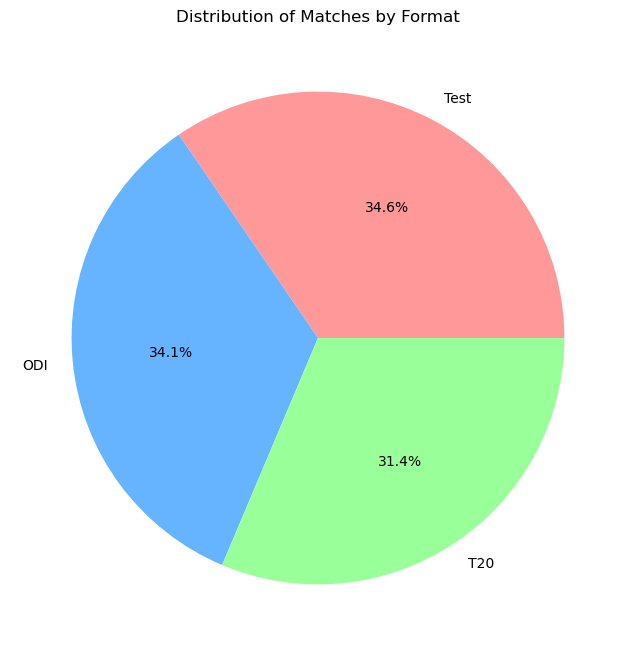

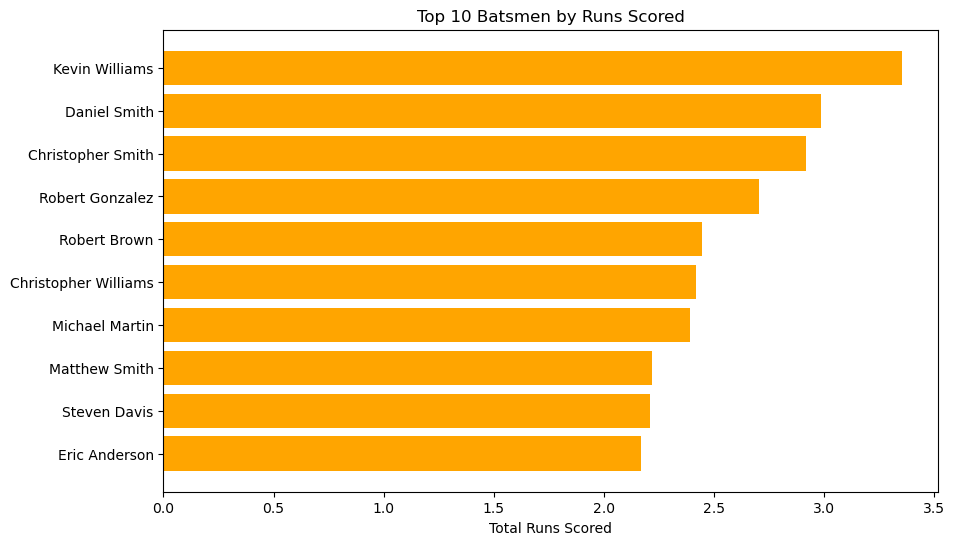

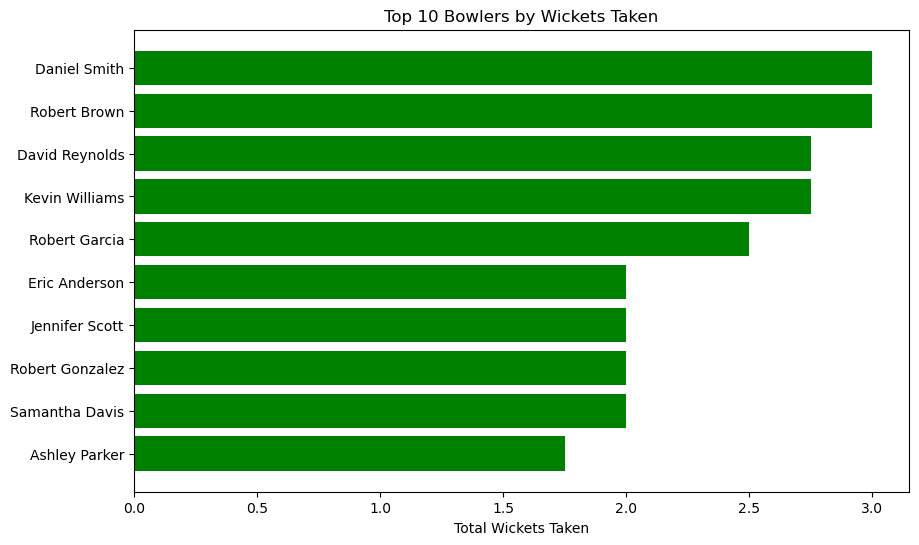

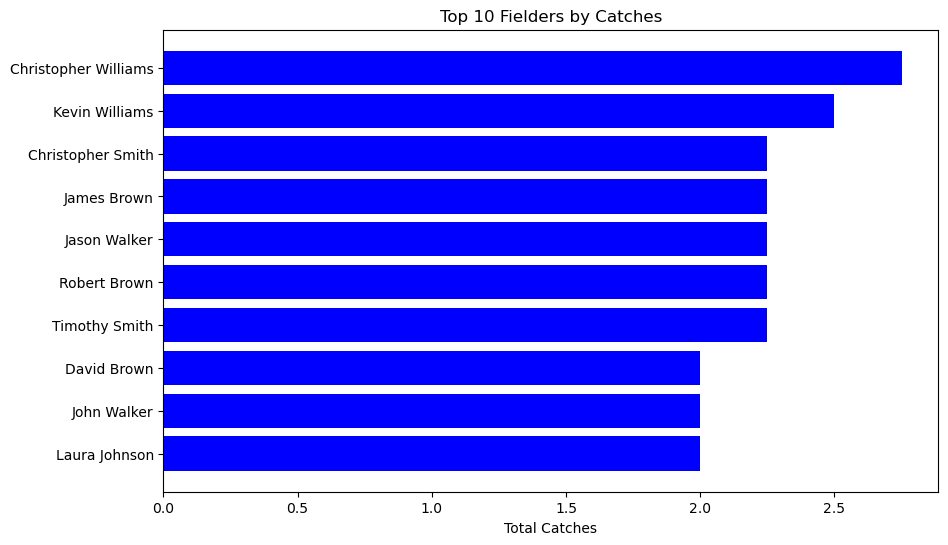

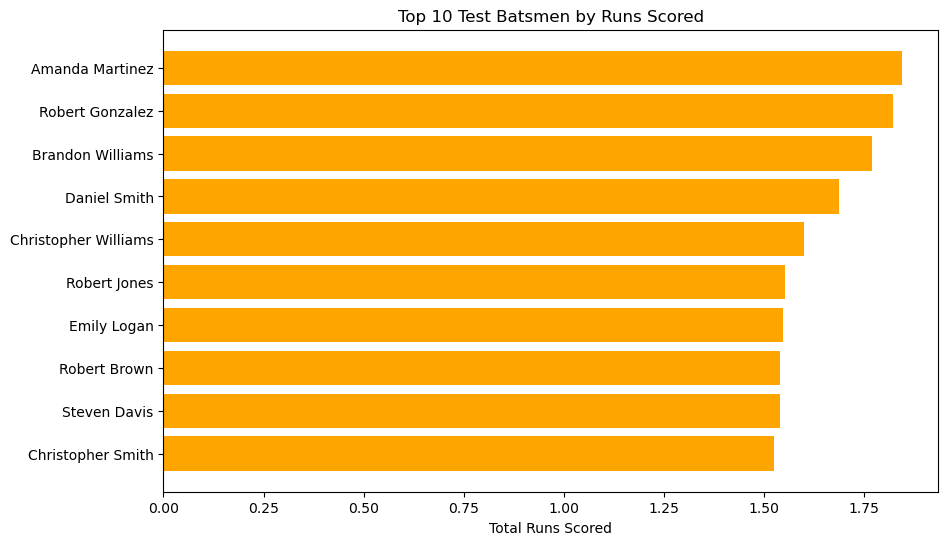

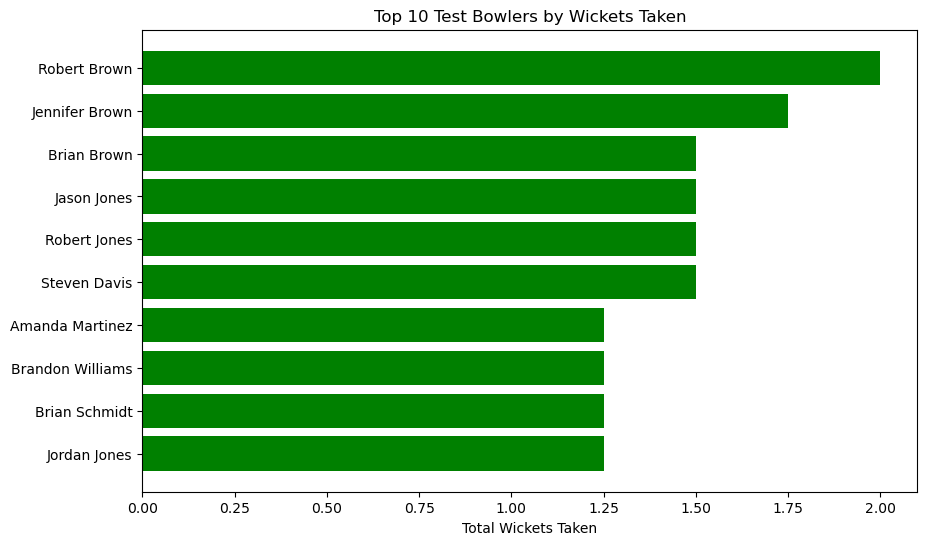

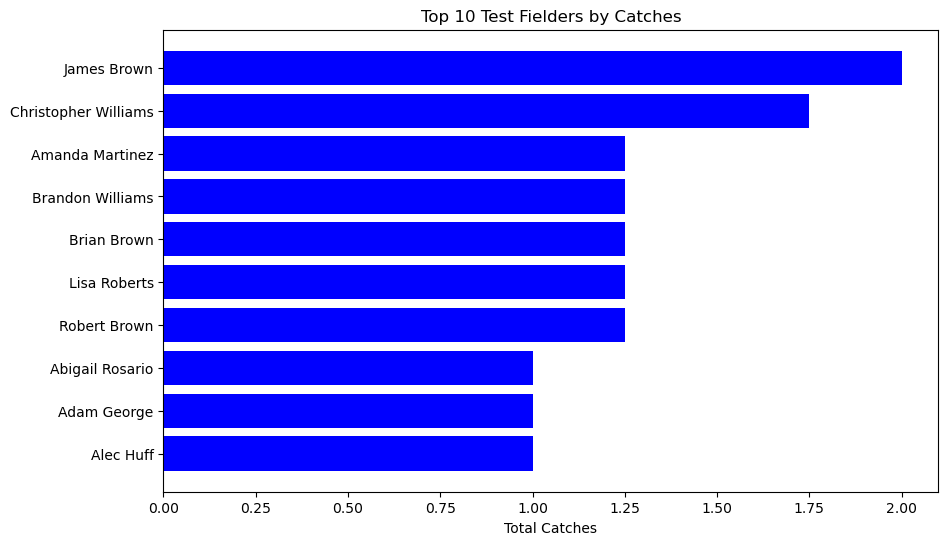

Silhouette Score for Batting Clustering: 0.7192117285624208
Silhouette Score for Bowling Clustering: 0.7330237882827874
Silhouette Score for Fielding Clustering: 0.7859810831789832


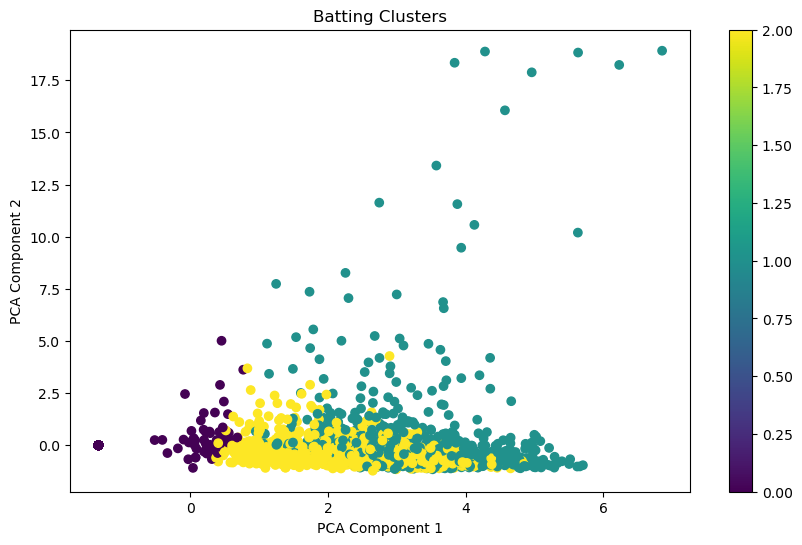

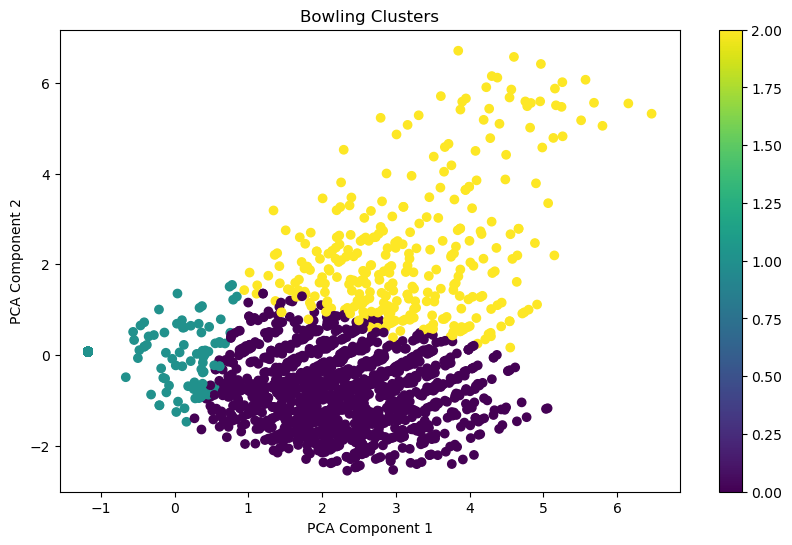

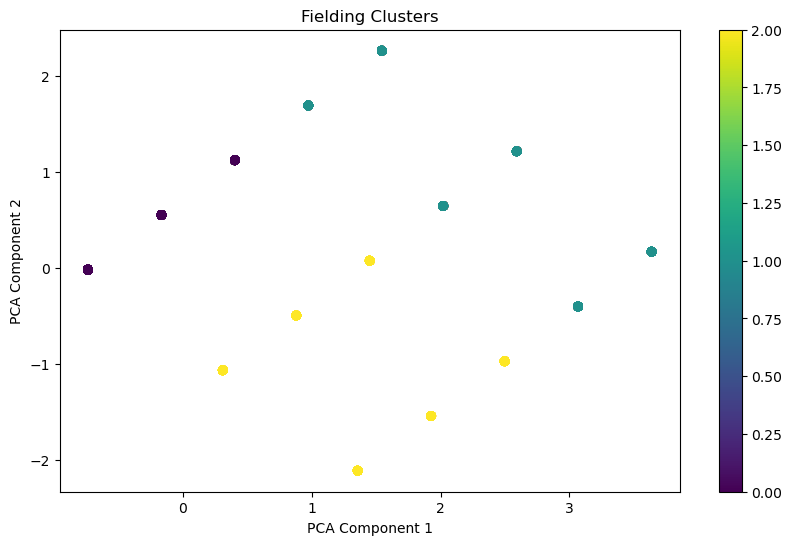

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Define columns for consistency
batting_columns = ['Runs_Scored', 'Balls_Faced', 'Fours', 'Sixes', 'Strike_Rate', 'Boundary_Percentage']
bowling_columns = ['Wickets_Taken', 'Overs_Bowled', 'Maiden_Overs', 'Runs_Conceded', 'Economy_Rate']
fielding_columns = ['Catches', 'Runouts']

# DataFrames for each format
df_t20_batting = df_t20_metrics[batting_columns + ['Player_Name']].copy()
df_t20_bowling = df_t20_metrics[bowling_columns + ['Player_Name']].copy()
df_t20_fielding = df_t20_metrics[fielding_columns + ['Player_Name']].copy()

df_odi_batting = df_odi_metrics[batting_columns + ['Player_Name']].copy()
df_odi_bowling = df_odi_metrics[bowling_columns + ['Player_Name']].copy()
df_odi_fielding = df_odi_metrics[fielding_columns + ['Player_Name']].copy()

df_test_batting = df_test_metrics[batting_columns + ['Player_Name']].copy()
df_test_bowling = df_test_metrics[bowling_columns + ['Player_Name']].copy()
df_test_fielding = df_test_metrics[fielding_columns + ['Player_Name']].copy()

# Combine all formats into a single DataFrame with 'Format' column
df_combined = pd.concat([
    df_t20_batting.assign(Format='T20'),
    df_odi_batting.assign(Format='ODI'),
    df_test_batting.assign(Format='Test'),
    df_t20_bowling.assign(Format='T20'),
    df_odi_bowling.assign(Format='ODI'),
    df_test_bowling.assign(Format='Test'),
    df_t20_fielding.assign(Format='T20'),
    df_odi_fielding.assign(Format='ODI'),
    df_test_fielding.assign(Format='Test')
])

# 1. Pie Chart of Matches by Format
plt.figure(figsize=(8, 8))
match_counts = df_combined['Format'].value_counts()
plt.pie(match_counts, labels=match_counts.index, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Distribution of Matches by Format')
plt.show()

# 2. Top 10 Players in All Formats
# a. Batting
top_batsmen = df_combined.groupby('Player_Name')['Runs_Scored'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(top_batsmen['Player_Name'], top_batsmen['Runs_Scored'], color='orange')
plt.xlabel('Total Runs Scored')
plt.title('Top 10 Batsmen by Runs Scored')
plt.gca().invert_yaxis()
plt.show()

# b. Bowling
top_bowlers = df_combined.groupby('Player_Name')['Wickets_Taken'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(top_bowlers['Player_Name'], top_bowlers['Wickets_Taken'], color='green')
plt.xlabel('Total Wickets Taken')
plt.title('Top 10 Bowlers by Wickets Taken')
plt.gca().invert_yaxis()
plt.show()

# c. Fielding
top_fielders = df_combined.groupby('Player_Name')['Catches'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(top_fielders['Player_Name'], top_fielders['Catches'], color='blue')
plt.xlabel('Total Catches')
plt.title('Top 10 Fielders by Catches')
plt.gca().invert_yaxis()
plt.show()

# 3. Visualizations for Test Format
# a. Test Batting Top 10 Players
top_test_batsmen = df_test_batting.groupby('Player_Name')['Runs_Scored'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(top_test_batsmen['Player_Name'], top_test_batsmen['Runs_Scored'], color='orange')
plt.xlabel('Total Runs Scored')
plt.title('Top 10 Test Batsmen by Runs Scored')
plt.gca().invert_yaxis()
plt.show()

# b. Test Bowling Top 10 Players
top_test_bowlers = df_test_bowling.groupby('Player_Name')['Wickets_Taken'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(top_test_bowlers['Player_Name'], top_test_bowlers['Wickets_Taken'], color='green')
plt.xlabel('Total Wickets Taken')
plt.title('Top 10 Test Bowlers by Wickets Taken')
plt.gca().invert_yaxis()
plt.show()

# c. Test Fielding Top 10 Players
top_test_fielders = df_test_fielding.groupby('Player_Name')['Catches'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(top_test_fielders['Player_Name'], top_test_fielders['Catches'], color='blue')
plt.xlabel('Total Catches')
plt.title('Top 10 Test Fielders by Catches')
plt.gca().invert_yaxis()
plt.show()

# Clustering for Batting, Bowling, and Fielding
features_batting = batting_columns
features_bowling = bowling_columns
features_fielding = fielding_columns

# Prepare data for clustering
df_batting = df_combined[df_combined['Format'] == 'T20'][features_batting].fillna(0)
df_bowling = df_combined[df_combined['Format'] == 'T20'][features_bowling].fillna(0)
df_fielding = df_combined[df_combined['Format'] == 'T20'][features_fielding].fillna(0)

# Standardize features
scaler = StandardScaler()
X_scaled_batting = scaler.fit_transform(df_batting)
X_scaled_bowling = scaler.fit_transform(df_bowling)
X_scaled_fielding = scaler.fit_transform(df_fielding)

# Apply KMeans clustering
kmeans_batting = KMeans(n_clusters=3, random_state=42)
clusters_batting = kmeans_batting.fit_predict(X_scaled_batting)

kmeans_bowling = KMeans(n_clusters=3, random_state=42)
clusters_bowling = kmeans_bowling.fit_predict(X_scaled_bowling)

kmeans_fielding = KMeans(n_clusters=3, random_state=42)
clusters_fielding = kmeans_fielding.fit_predict(X_scaled_fielding)

# Calculate silhouette score
silhouette_batting = silhouette_score(X_scaled_batting, clusters_batting)
silhouette_bowling = silhouette_score(X_scaled_bowling, clusters_bowling)
silhouette_fielding = silhouette_score(X_scaled_fielding, clusters_fielding)

print("Silhouette Score for Batting Clustering:", silhouette_batting)
print("Silhouette Score for Bowling Clustering:", silhouette_bowling)
print("Silhouette Score for Fielding Clustering:", silhouette_fielding)

# Perform PCA for visualization
pca = PCA(n_components=2)
X_pca_batting = pca.fit_transform(X_scaled_batting)
X_pca_bowling = pca.fit_transform(X_scaled_bowling)
X_pca_fielding = pca.fit_transform(X_scaled_fielding)

# Plot clusters
plt.figure(figsize=(10, 6))
scatter_batting = plt.scatter(X_pca_batting[:, 0], X_pca_batting[:, 1], c=clusters_batting, cmap='viridis')
plt.colorbar(scatter_batting)
plt.title('Batting Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

plt.figure(figsize=(10, 6))
scatter_bowling = plt.scatter(X_pca_bowling[:, 0], X_pca_bowling[:, 1], c=clusters_bowling, cmap='viridis')
plt.colorbar(scatter_bowling)
plt.title('Bowling Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

plt.figure(figsize=(10, 6))
scatter_fielding = plt.scatter(X_pca_fielding[:, 0], X_pca_fielding[:, 1], c=clusters_fielding, cmap='viridis')
plt.colorbar(scatter_fielding)
plt.title('Fielding Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
